<a href="https://colab.research.google.com/github/Borg2/MNIST-Fashion-NN/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import math
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import fashion_mnist
from keras.regularizers import l2
from keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

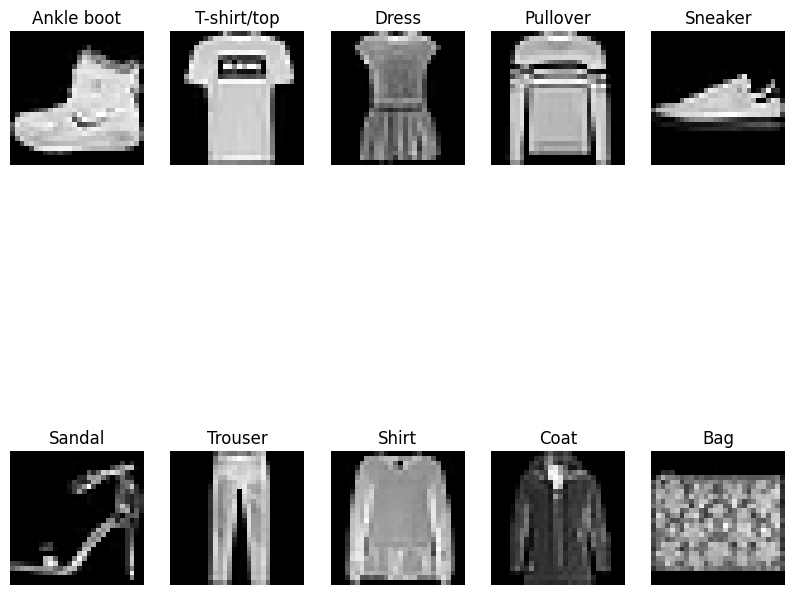

In [140]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data() #loading the dataset

assert x_train.shape == (60000,28,28)
assert x_test.shape == (10000,28,28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


class_images = {}

# Iterate through the training set and store the first image of each class
for image, label in zip(x_train, y_train):
    if label not in class_images:
        class_images[label] = image

# Plot the images
plt.figure(figsize=(10, 10))
for i, (label, image) in enumerate(class_images.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')
plt.show()

In [141]:
x_train , x_test = x_train/255.0,x_test/255.0 #normalizing the data

#converting the labels to one hot encoded vectors
y_train = to_categorical(y_train,10)
y_test_encoded = to_categorical(y_test,10)

#splitting the training data into training and validation sets
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.1)

In [147]:
#building the model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
#defining the learning rate scheduler
def scheduler (epoch,lr):
    if epoch < 25:
      return lr
    else:
      return lr * 0.1

In [149]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=40,batch_size=64,validation_data=(x_val,y_val),callbacks=[LearningRateScheduler(scheduler)])

Epoch 1/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6834 - loss: 0.8907 - val_accuracy: 0.8505 - val_loss: 0.4171 - learning_rate: 0.0010
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8401 - loss: 0.4547 - val_accuracy: 0.8695 - val_loss: 0.3812 - learning_rate: 0.0010
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8507 - loss: 0.4072 - val_accuracy: 0.8657 - val_loss: 0.3728 - learning_rate: 0.0010
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8600 - loss: 0.3878 - val_accuracy: 0.8745 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8716 - loss: 0.3562 - val_accuracy: 0.8792 - val_loss: 0.3299 - learning_rate: 0.0010
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8734 - loss: 0.3508 - val_accuracy: 0.8857 - val_loss: 0.3182 - learning_rate: 0.0010
Epoch 7/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8767 - loss

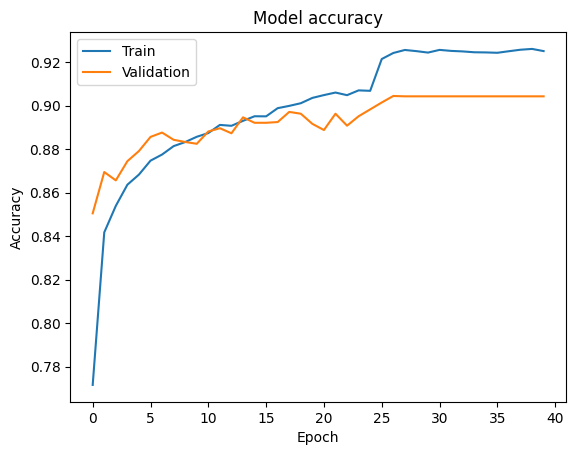

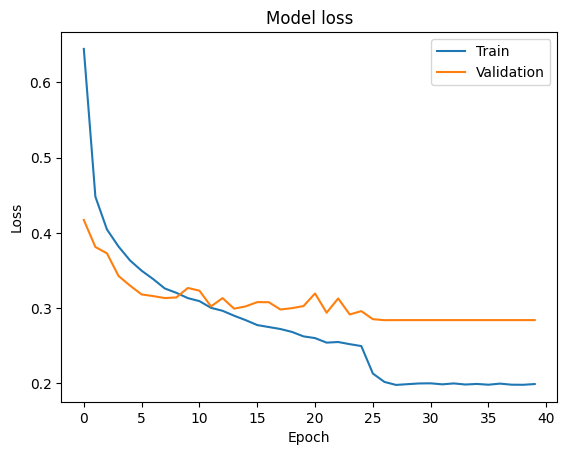

In [150]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [151]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000,)

In [157]:
#model prediction
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
#calculate the classification report
report = classification_report(y_test, y_pred_classes,target_names=class_names)
# Print the classification report
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.82      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.70      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



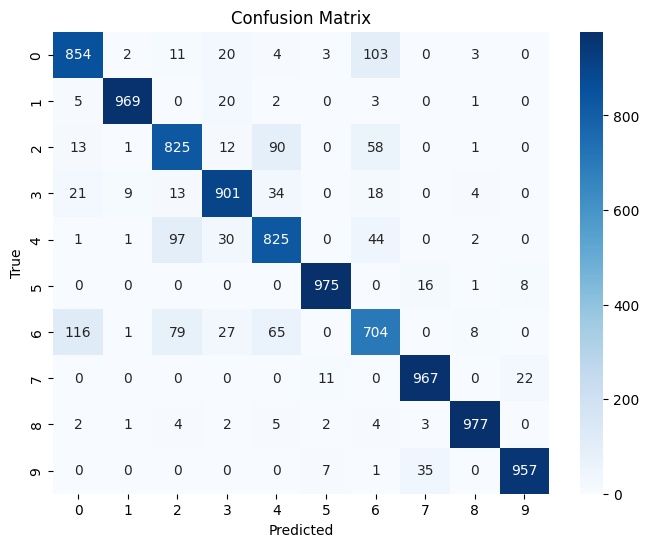

In [153]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

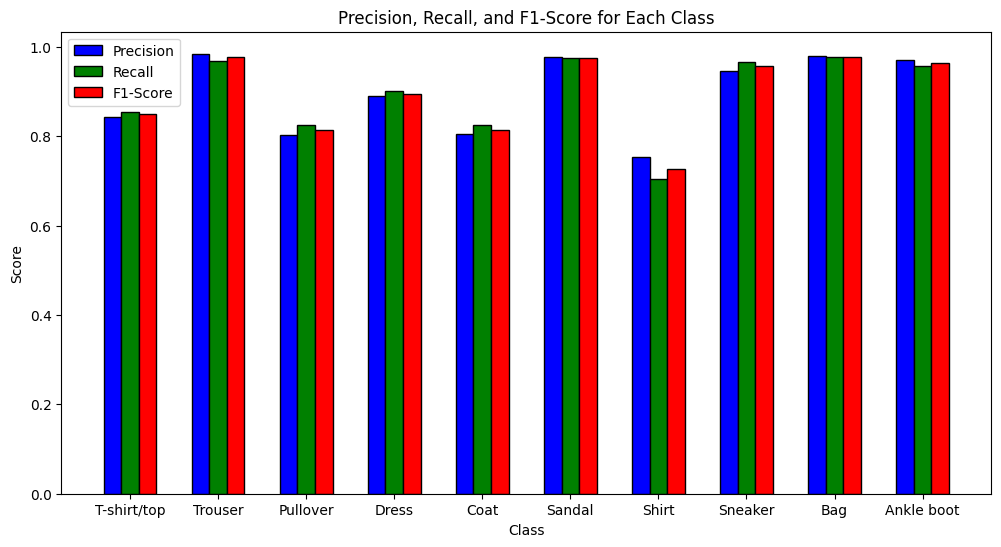

In [154]:
from sklearn.metrics import classification_report


# Extract metrics
precision = [report[cls]['precision'] for cls in report if cls .isdigit()]
recall = [report[cls]['recall'] for cls in report if cls.isdigit()]
f1_score = [report[cls]['f1-score'] for cls in report if cls.isdigit()]

bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r3, f1_score, color='red', width=bar_width, edgecolor='black', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xticks([r + bar_width  for r in range(len(class_names))], class_names)
plt.legend()

# Show the plot
plt.show()